In [1]:
!pip3 install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=44067ae0ac6a8916bcf192194ab434cb


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bharatpur
Processing Record 2 of Set 1 | roseburg
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | warmbad
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | kemijarvi
Processing Record 9 of Set 1 | te anau
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | komsomolskiy
Processing Record 12 of Set 1 | nouadhibou
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | bintulu
Processing Record 15 of Set 1 | padang
Processing Record 16 of Set 1 | casper
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | jawhar
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | uspenka
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | bluff
Processing Record 

Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | abhar
Processing Record 44 of Set 4 | buxar
Processing Record 45 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 46 of Set 4 | praxedis guerrero
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | kizukuri
Processing Record 49 of Set 4 | thinadhoo
Processing Record 50 of Set 4 | nerchinskiy zavod
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | heze
Processing Record 3 of Set 5 | urucara
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | jarva-jaani
Processing Record 7 of Set 5 | campbellsville
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | kaeo
Processing Record 10 of Set 5 | tamandare
Processing Record 11 of Set 5 | hervey bay
Processing Record 12 of Set 5 | chalus
Processing Record 13 of Set 5 | khatanga
Processing Record 14 of Set 5 | belushya

Processing Record 30 of Set 8 | samarkand
Processing Record 31 of Set 8 | ginda
Processing Record 32 of Set 8 | tongzi
Processing Record 33 of Set 8 | russell
Processing Record 34 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 35 of Set 8 | babanusah
City not found. Skipping...
Processing Record 36 of Set 8 | borogontsy
Processing Record 37 of Set 8 | arcata
Processing Record 38 of Set 8 | shenjiamen
Processing Record 39 of Set 8 | chagda
City not found. Skipping...
Processing Record 40 of Set 8 | karla
Processing Record 41 of Set 8 | revadanda
Processing Record 42 of Set 8 | chuy
Processing Record 43 of Set 8 | kavaratti
Processing Record 44 of Set 8 | wahran
City not found. Skipping...
Processing Record 45 of Set 8 | soyo
Processing Record 46 of Set 8 | erenhot
Processing Record 47 of Set 8 | manzanillo
Processing Record 48 of Set 8 | saint anthony
Processing Record 49 of Set 8 | boden
Processing Record 50 of Set 8 | vaitape
Processing Record 1 of Set 9 | kudahuva

Processing Record 20 of Set 12 | alnavar
Processing Record 21 of Set 12 | vrangel
Processing Record 22 of Set 12 | zemio
Processing Record 23 of Set 12 | najran
Processing Record 24 of Set 12 | oyama
Processing Record 25 of Set 12 | paracuru
Processing Record 26 of Set 12 | kartarpur
Processing Record 27 of Set 12 | shahr-e babak
Processing Record 28 of Set 12 | lamont
Processing Record 29 of Set 12 | paraibano
Processing Record 30 of Set 12 | sovetskiy
Processing Record 31 of Set 12 | karratha
Processing Record 32 of Set 12 | caravelas
Processing Record 33 of Set 12 | saint-leu
Processing Record 34 of Set 12 | bandar-e lengeh
Processing Record 35 of Set 12 | pumiao
Processing Record 36 of Set 12 | magadan
Processing Record 37 of Set 12 | qinnan
Processing Record 38 of Set 12 | phonhong
Processing Record 39 of Set 12 | dali
Processing Record 40 of Set 12 | bandarbeyla
Processing Record 41 of Set 12 | sidi qasim
City not found. Skipping...
Processing Record 42 of Set 12 | port augusta
P

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bharatpur,27.2167,77.4833,73.67,33,0,1.81,IN,2022-01-31 08:10:55
1,Roseburg,43.2165,-123.3417,42.91,85,75,0.00,US,2022-01-31 08:08:04
2,Thompson,55.7435,-97.8558,-5.55,98,92,4.76,CA,2022-01-31 08:10:55
3,Warmbad,-28.4500,18.7333,86.18,43,15,15.79,NA,2022-01-31 08:10:56
4,Rikitea,-23.1203,-134.9692,77.22,62,100,4.88,PF,2022-01-31 08:05:37
5,Butaritari,3.0707,172.7902,82.24,77,69,18.70,KI,2022-01-31 08:08:01
6,Kemijarvi,66.7131,27.4306,-1.59,99,31,2.26,FI,2022-01-31 08:10:56
7,Te Anau,-45.4167,167.7167,64.81,87,80,3.24,NZ,2022-01-31 08:03:13
8,Punta Arenas,-53.1500,-70.9167,50.11,71,40,34.52,CL,2022-01-31 08:10:57
9,Komsomolskiy,40.4272,71.7189,36.82,93,100,4.61,UZ,2022-01-31 08:03:17


In [18]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bharatpur,IN,2022-01-31 08:10:55,27.2167,77.4833,73.67,33,0,1.81
1,Roseburg,US,2022-01-31 08:08:04,43.2165,-123.3417,42.91,85,75,0.00
2,Thompson,CA,2022-01-31 08:10:55,55.7435,-97.8558,-5.55,98,92,4.76
3,Warmbad,NA,2022-01-31 08:10:56,-28.4500,18.7333,86.18,43,15,15.79
4,Rikitea,PF,2022-01-31 08:05:37,-23.1203,-134.9692,77.22,62,100,4.88
5,Butaritari,KI,2022-01-31 08:08:01,3.0707,172.7902,82.24,77,69,18.70
6,Kemijarvi,FI,2022-01-31 08:10:56,66.7131,27.4306,-1.59,99,31,2.26
7,Te Anau,NZ,2022-01-31 08:03:13,-45.4167,167.7167,64.81,87,80,3.24
8,Punta Arenas,CL,2022-01-31 08:10:57,-53.1500,-70.9167,50.11,71,40,34.52
9,Komsomolskiy,UZ,2022-01-31 08:03:17,40.4272,71.7189,36.82,93,100,4.61


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

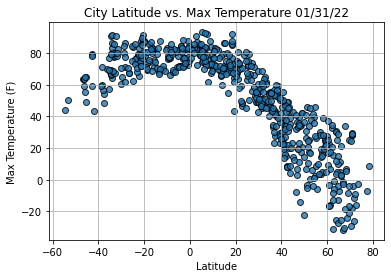

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

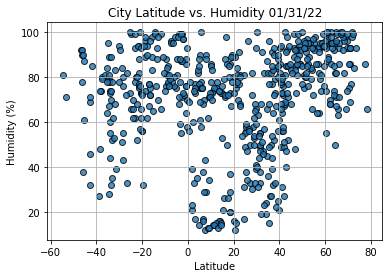

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

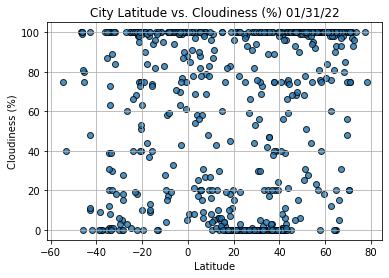

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

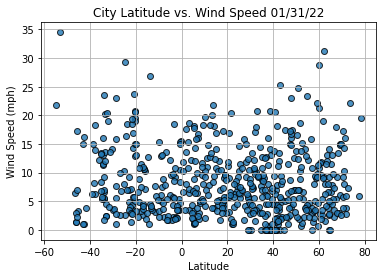

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

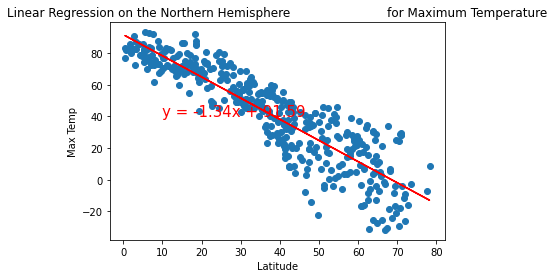

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

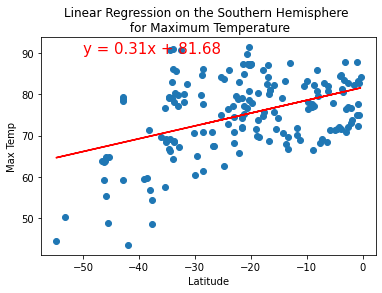

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

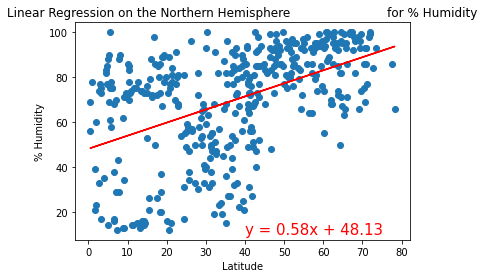

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

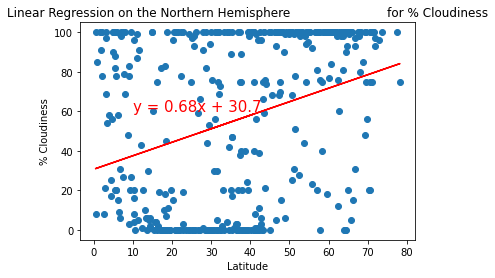

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

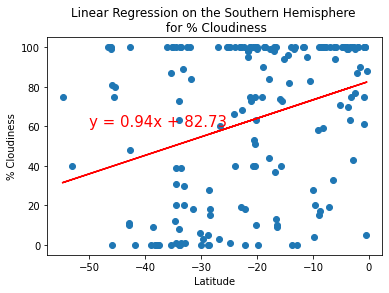

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

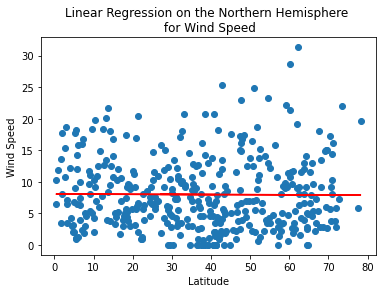

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

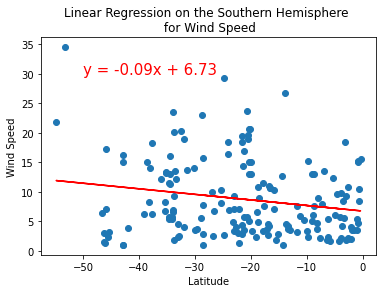

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))